## Mini Introdução OO

Uma grande parte das bibliotecas de hoje em dia exploram conceitos de orientação a objetos. Embora não tempos tempo de ensinar um curso inteiro de OO, seria pelo menos um semestre, podemos cobrir o essencial neste notebook. Caso queira uma única palavra para sumarizar: o essencial aqui é o conceito de **estado**!.

Existem dois termos importantes para entender OO:
1. Classes
2. Objetos

Classes definem um esqueleto do que será armazenado. Objetos definem uma instância da classe na memória. Abaixo temos uma classe simples chamadas de agregador. No momento, a mesma não faz nada!

In [0]:
class Agregador(object):
    pass

Podemos instanciar nossas classes, ficando assim com dois objetos na memória:

In [0]:
obj1 = Agregador()
obj2 = Agregador()

Cada instância, ou objeto, difere um do outro

In [0]:
obj1 == obj2

False

Agora, vamos adicionar um **atributo**, um pouco de memória, na nossa classe. O mesmo guarda um valor simples. Se objetos são instâncias de classes, algum local tem guardar o estado desta instância. Em python, tal local é chamado de **self**. Todo objeto tem uma referência para seu estado, o self, que no fim das contas é uma referência para ele mesmo. 

O método `__init__(self)` é o **construtor** da classe, ou seja, quando um objeto é instanciado, esse método é chamado para definir o estado inicial do objeto. 

In [0]:
class Agregador(object):
    def __init__(self):
        self._value = 0   # Toda instância agora guarda um inteiro simples!

In [0]:
obj1 = Agregador()
obj2 = Agregador()

print(obj1._value)
print(obj2._value)

0
0


Dois objetos podem guardar um mesmo estado. Acima, os dois tem valor = 0. Ainda assim, são dois objetos diferentes, ocupam locais diferentes da memória do computador.

In [0]:
hex(id(obj1))

'0x7fdf8b2a8eb8'

In [0]:
hex(id(obj2))

'0x7fdf8b2a8e80'

Por fim, objetos funcionam através de referências. A linha abaixo não cria um objeto novo, temos duas referências para um mesmo local da memória.

In [0]:
obj3 = obj1
hex(id(obj3)) # note como aqui temos o mesmo endereco do obj1

'0x7fdf8b2a8eb8'

In [0]:
hex(id(obj1))

'0x7fdf8b2a8eb8'

Como obj1 e obj3 são a mesma coisa, ao mudar um mudamos o outro.

In [0]:
obj1._value = 9

In [0]:
print(obj3._value)

9


Agora vamos tornar os nossos objetos um pouco mais inteligentes. Para tal, vamos adicionar um **método**, nome bonito para uma função, que altera o valor do atributo `_value`.

Embora é possível acessar o estado do objeto diretamente em python (vide acima), é uma boa prática alterar o mesmo usando apenas métodos. Por isso coloco um `_` antes do atributo, para indicar que não é bom acessar o mesmo diretamente.

In [0]:
class Agregador(object):
    
    def __init__(self):
        self._value = 0 
    
    def adiciona(self, value):
        self._value += value
        
    def get_value(self):
        return self._value

In [0]:
agg = Agregador()

Observe como temos uma chamada `get_value()`. 

In [0]:
print(agg.get_value())

0


Ao adicionar alguma coisa, temos um novo estado!

In [0]:
agg.adiciona(7)
print(agg.get_value())

7


Abaixo temos dois objetos diferentes com o mesmo estado. É isto!

In [0]:
agg2 = Agregador()
agg2.adiciona(agg.get_value())

print(agg == agg2)
print(agg.get_value() == agg2.get_value())

False
True


No fim toda classe vai ser da forma:

```
class MinhaClasse(object):
    <código>
```

## Forward e Backward

In [0]:
import torch
from torch.autograd import Variable

Imagine que você tem uma memória onde você guarda algumas funções para derivar. Vamos criar uma mini-biblioteca de derivadas agora. A mesma é composta de classes que representam produtos e exponenciais. 

Vamos começar definindo a `CamadaProduto`. Ela deve conter três métodos:
- `__init__(self, valor)` inicializando o seu parâmetro interno. Sem retorno.
- `forward(self, entrada)` retornando o produto da entrada com seu parâmetro interno.
- `backward(self)` retornando a derivada da operação realizada pela camada
  - $\partial_x kx = k $

In [0]:
class CamadaProduto(object):
  def __init__(self, valor):
    self._valor = valor

  def forward(self, entrada):
    return entrada * self._valor
    
  def backward(self):
    return self._valor

Use a célula a seguir para testar a implementação da sua camada. A célula já implementa o forward de uma entrada na `CamadaProduto`, basta agora realizar as seguintes operações:
- Calcular o gradiente automaticamente com as funções do torch. 
- Chamar a função `backward` da classe `CamadaProduto` que implementa manualmente a derivação.

In [0]:
camada = CamadaProduto(7.)

entrada = torch.tensor([9.], requires_grad=True)
saida   = camada.forward(entrada) 
print("Saída:", saida, '\n')

# TODO: Autograd Torch
saida.backward()
print("Autograd Torch:", entrada.grad)

# Backward manualmente implementado
print("Backward manual:", camada.backward())

Saída: tensor([63.], grad_fn=<MulBackward0>) 

Autograd Torch: tensor([7.])
Backward manual: 7.0


Note que temos um parâmetro no `__init__`. Tal método é uma chamada especial que inicializa o estado. Veja no passo a passo [deste link](http://pythontutor.com/visualize.html#code=class%20CamadaProduto%28object%29%3A%0A%20%20def%20__init__%28self,%20valor%29%3A%0A%20%20%20%20self._valor%20%3D%20valor%0A%0A%20%20def%20forward%28self,%20entrada%29%3A%0A%20%20%20%20self._entrada%20%3D%20entrada%0A%20%20%20%20return%20entrada%20*%20self._valor%0A%20%20%20%20%0A%20%20def%20backward%28self%29%3A%0A%20%20%20%20%20%20return%20self._entrada%0A%20%20%20%20%20%20%20%20%0Acamada%20%3D%20CamadaProduto%287%29%0A%0Aentrada%20%3D%209%0Aprint%28camada.forward%28entrada%29%29%0Aprint%28camada.backward%28%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) como ela é chamada ao criar o objeto.

Note também como em algum momento temos dois objetos na memória com estados diferentes.

**Brinque com o passo a passo do link acima antes de continuar!**

.
.
.

Agora, vamos criar uma camada que cuida da forma: $f(x, n) = x^n$. Esta deve ser chamada `CamadaPolinomial` e conter os mesmos métodos da camada implementada previamente, eles são:
- `__init__(self, valor)` inicializando o seu parâmetro interno. Sem retorno.
- `forward(self, entrada)` retornando a potência da entrada elevada ao seu parâmetro interno.
- `backward(self)` retornando a derivada da operação realizada pela camada
  - $\partial_x x^k = kx^{k-1} $

In [0]:
class CamadaPolinomial(object):
  
  def __init__(self, valor):
    self._valor = valor

  def forward(self, entrada):
    self._entrada = entrada
    return torch.pow(entrada, self._valor)

  def backward(self):
    with torch.no_grad():
      return self._valor * self._entrada ** (self._valor - 1)

Assim como da última vez, teste abaixo a sua camada.

In [0]:
camada = CamadaPolinomial(7.)

entrada = torch.tensor([9.], requires_grad=True)
saida   = camada.forward(entrada) 
print("Saída:", saida, '\n')

# Autograd Torch
saida.backward()
print("Autograd Torch:", entrada.grad)

# Backward manualmente implementado
print("Backward manual:", camada.backward())

Saída: tensor([4782969.], grad_fn=<PowBackward0>) 

Autograd Torch: tensor([3720087.])
Backward manual: tensor([3720087.])


A ideia da derivação automágica do pytorch é mais ou menos essa. Diferente da brincadeira acima, a biblioteca é capaz de derivar bem mais do que polinômios.

Que tal ver agora como tudo se junta em uma rede neural?<br>
Vamos criar uma classe `RedeNeural` implementando a seguinte arquitetura:
1. CamadaProduto
2. CamadaPolinomial
3. CamadaProduto

A classe vai implementar os mesmos métodos que implementamos para as camadas, porém com objetivos levemente diferentes. Eles são:
- `__init__(self, valor1, valor2, valor3)` definindo as camadas que irão compor a rede. Os parâmetros de valor devem ser usados para inicializar as camadas.
- `forward(self, entrada)` realizando o forward em todas as camadas da rede, na ordem correta e retornando a saída.
- `backward(self)` retornando a derivada da operação realizada pela rede. Nesse caso precisamos aplicar a regra da cadeia, definida por:
  - $\partial_x f(g(p(x))) = f'(g(p(x))) \times g'(p(x)) \times p'(x) $ <br>

> Note que estamos implementando o backward apenas para comparação com o autograd do pytorch. Quando implementarmos um problema real o backward manual não é necessário.


In [0]:
class RedeNeural(object):
  
  def __init__(self, l1, l2, l3):

    self.layer1 = CamadaProduto(l1)
    self.layer2 = CamadaPolinomial(l2)
    self.layer3 = CamadaProduto(l3)

  def forward(self, entrada):

    x = self.layer1.forward(entrada)
    x = self.layer2.forward(x) 
    x = self.layer3.forward(x) 

    return x

  def backward(self):
    diff = self.layer3.backward() * self.layer2.backward() * self.layer1.backward()
    return diff

Vamos testar? :)

In [0]:
valores = [7, 2, 3]
net = RedeNeural(valores[0], valores[1], valores[2])

entrada = Variable(torch.tensor([7.]), requires_grad=True)
out = net.forward(entrada)
print(out, '\n')

out.backward()
print("Autograd Torch:", entrada.grad)

# Backward manualmente implementado
print("Backward manual:", net.backward())

tensor([7203.], grad_fn=<MulBackward0>) 

Autograd Torch: tensor([2058.])
Backward manual: tensor([2058.])


Note que o `grad_fn` da variável de saída apresenta apenas a última operação realizada pela rede, que representa a folha do grafo computacional. Para visualizar todo o grafo podemos usar a biblioteca **torchviz**. Sua implementação e documentação podem ser encontradas em: 
https://github.com/szagoruyko/pytorchviz

Vamos começar instalando a biblioteca.

In [0]:
!pip install torchviz
import graphviz, torchviz

Agora basta rodar a função `make_dot` passando como parâmetro a variável de saída da rede.

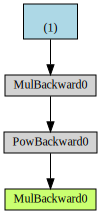

In [0]:
out = net.forward(entrada)
torchviz.make_dot(out)